# Data Exploration & Cleaning


|Num|Field|Description|
|---|-----|----------|
|1 | school | student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) |
|2 | sex | student's sex (binary: "F" - female or "M" - male)|
|3 | age | student's age (numeric: from 15 to 22) |
|4 | address | student's home address type (binary: "U" - urban or "R" - rural) |
|5 | famsize | family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) |
|6 | Pstatus | parent's cohabitation status (binary: "T" - living together or "A" - apart)|
|7 | Medu | mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) |
|8 | Fedu | father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) |
|9 | Mjob | mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")|
|10| Fjob | father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")|
|11 | reason | reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")|
|12 | guardian | student's guardian (nominal: "mother", "father" or "other")|
|13 | traveltime | home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)|
|14 | studytime | weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)|
|15 | failures | number of past class failures (numeric: n if 1<=n<3, else 4)|
|16 | schoolsup | extra educational support (binary: yes or no)|
|17 | famsup | family educational support (binary: yes or no)|
|18 | paid | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)|
|19 | activities | extra-curricular activities (binary: yes or no)|
|20 | nursery | attended nursery school (binary: yes or no)|
|21 | higher | wants to take higher education (binary: yes or no)|
|22 | internet | Internet access at home (binary: yes or no)|
|23 | romantic | with a romantic relationship (binary: yes or no)|
|24 | famrel | quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|
|25 | freetime | free time after school (numeric: from 1 - very low to 5 - very high)|
|26 | goout | going out with friends (numeric: from 1 - very low to 5 - very high)|
|27 | Dalc | workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|28 | Walc | weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|29 | health | current health status (numeric: from 1 - very bad to 5 - very good)|
|30 | absences | number of school absences (numeric: from 0 to 93)|
|31 | G1 | first period grade (numeric: from 0 to 20) |
|31 | G2 | second period grade (numeric: from 0 to 20) |
|32 | G3 | final grade (numeric: from 0 to 20, output target)


* Note - Lots of ordinal variables. Estimates of conditional probabilities rather than conditional means.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union, Dict, Optional, List

%matplotlib inline
sns.set(style='dark')

In [49]:
def annotate(axes:Union[np.ndarray, plt.Axes]):
    '''
    annotate a singular ax or a matrix of subplots ax
    inputs: 
        axes: singular matplotlib.pyplot ax or a matrix or ax
    '''
    def _annotate(ax: plt.Axes):
        for p in ax.patches:

            # establish text position
            _horizontal_position = p.get_x() + p.get_width() / 2
            _vertical_position = p.get_y() + p.get_height() / 2

            # define the value to add to the graph
            value = f'{int(p.get_height())}' 

            # add text
            ax.text(_horizontal_position, _vertical_position, value,  ha="center", fontsize=12) 
            pass
    
    if isinstance(axes, np.ndarray):
        for _, ax in np.ndenumerate(axes):
            _annotate(ax)
    else:
        _annotate(axes)
    pass

In [32]:
RAW_PATH = '../data/raw/student-mat.csv'
raw = pd.read_csv(RAW_PATH, sep=';')
processed = raw.copy(deep=True)

In [25]:
raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

* There are 395 students in the dataset
* There are no missing values in the dataset

In [41]:
# there are no null values in the data
target_columns = ['G1', 'G2', 'G3']
raw[target_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


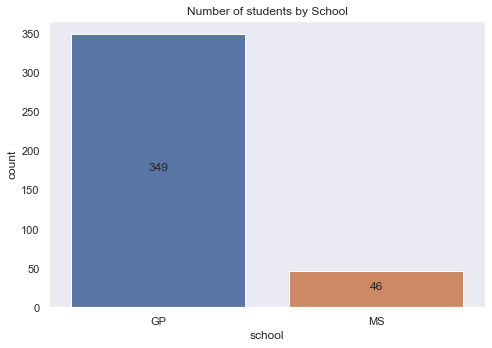

In [51]:
# look at the distribution of students between the schools
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=raw, x='school')
ax.set_title('Number of students by School')

# annotate the figure
annotate(ax)
plt.show()

* Gabriel Pereira school is represented 7~ times more than Mousinho da Silveira.

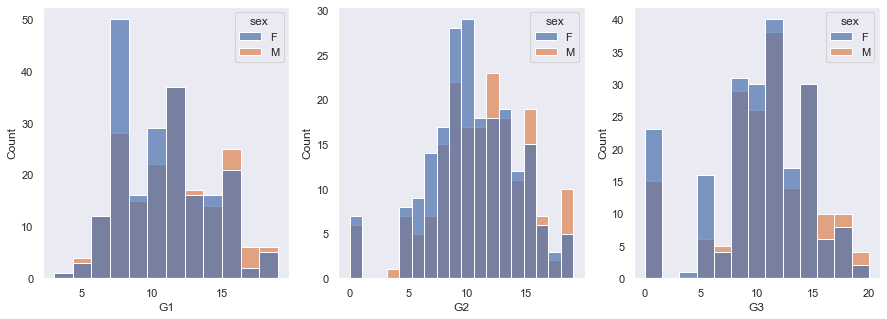

In [18]:
# look at the grade distribution between genders
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax = ax.ravel()
for i in range(3):
    sns.histplot(data=raw, x=target_columns[i], hue='sex', ax=ax[i], alpha=0.7)

In [ ]:
# look at the grade distribution between genders
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax = ax.ravel()
for i in range(3):
    sns.histplot(data=raw, x=target_columns[i], hue='sex', ax=ax[i], alpha=0.7)

In [56]:
raw.groupby('sex').agg({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})

,G1,G2,G3
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


* Are boys better at math than girls?

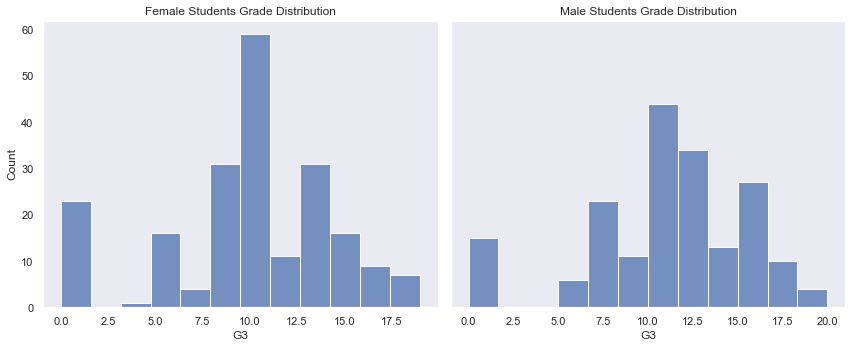

In [73]:
girls_math = raw.loc[raw['sex'] == 'F']
boys_math = raw.loc[raw['sex'] != 'F']

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax = ax.ravel()

sns.histplot(data=girls_math, x='G3', ax=ax[0])
ax[0].set_title('Female Students Grade Distribution')

sns.histplot(data=boys_math, x='G3', ax=ax[1])
ax[1].set_title('Male Students Grade Distribution')

plt.tight_layout()

* ### Null hypotehsis (H0) - The samples are drawn from a normal distribution.

In [74]:
import scipy as sp
from scipy.stats import shapiro

alpha = 0.05
f_stat, f_pvalue = shapiro(girls_math['G3'])
m_stat, m_pvalue = shapiro(boys_math['G3'])

def test_hypothesis(alpha: float, pvalue: float) -> None:
    if pvalue > alpha:
        print('Fail to reject hypothesis')
    else:
        print('Reject hypotehsis')

print(f'Girls:')
test_hypothesis(alpha, f_pvalue)

print(f'Boys:')
test_hypothesis(alpha, m_pvalue)

Girls:
Reject hypotehsis
Boys:
Reject hypotehsis


* Unfortunantely, the samples don't follow a normal distribution. 
* Using bootstrap to find the standard deviation and the population mean.

In [101]:
%%time

def bootstrap(data: pd.Series, size: Optional[int] = 28, times: Optional[int] = int(5e4)):
    
    means = np.array([])
    for _ in range(times):
        sample_mean = data.sample(n=size, replace=True).mean()
        means = np.append(means, sample_mean)
        means = pd.Series(means)
    
    return means.mean(), means.std()

mean_girl_grades, std_girl_grades = bootstrap(girls_math['G3'])
mean_boy_grades, std_boy_gradse = bootstrap(boys_math['G3'])

Wall time: 27.7 s


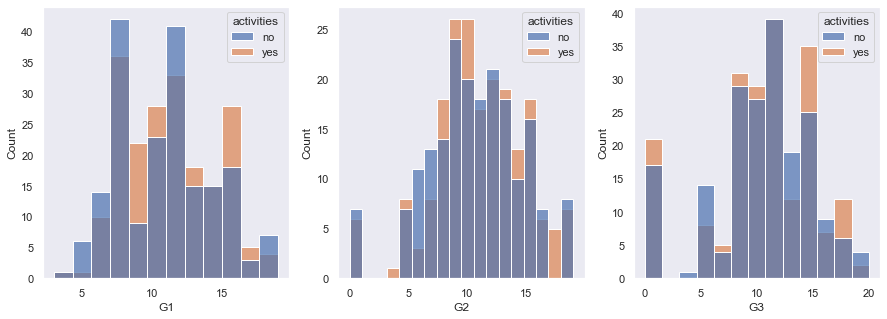

In [53]:
# look at the grade distribution among those with after school activities
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax = ax.ravel()
for i in range(3):
    sns.histplot(data=raw, x=target_columns[i], hue='activities', ax=ax[i], alpha=0.7)

* Do children that have afterschool acitivties do better at math?

In [54]:
raw.groupby('activities').agg({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})

,G1,G2,G3
activities,,,
no,10.716495,10.520619,10.340206
yes,11.094527,10.900498,10.487562


In [55]:
raw.groupby('activities').agg({'G1': 'median', 'G2': 'median', 'G3': 'median'})

,G1,G2,G3
activities,,,
no,11,11,11
yes,11,11,11


## Preparing Data for Modeling

    1. Binary Indicators

In [39]:
binary_columns = [
    'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic'
]

binary = lambda x: 1 if x == 'yes'else 0

# convert assigned sex at birth to binary indicator
processed['sex'] = raw['sex'].map(lambda sex: binary(sex))

# convert additional school support to binary indicator
processed['schoolsup'] = raw['schoolsup'].map(lambda status: binary(status))

# convert additional parental support to binary indicator
processed['famsup'] = raw['famsup'].map(lambda family: binary(family))

# convert additional paid support to binary indicator
processed['paid'] = raw['paid'].map(lambda paid: binary(paid))

# convert after school activities to binary indicator
processed['activities'] = raw['activities'].map(lambda activity: binary(activity))

# convert attendance at nursary school to binary indicator
processed['nursery'] = raw['nursery'].map(lambda nursery: binary(nursery))

# convert aspiration towards higher education to binary indicator
processed['higher'] = raw['higher'].map(lambda higher: binary(higher))

# convert access to internet at home to binary indicator
processed['internet'] = raw['internet'].map(lambda internet: binary(internet))

# convert romantic relationship to binary indicator
processed['romantic'] = raw['romantic'].map(lambda romantic: binary(romantic))

# convert parental cohabitation status to binray indicator
processed['divorced'] = raw['Pstatus'].map(lambda status: 1 if status.lower() == 'a' else 0)
processed = processed.drop('Pstatus', axis=1)

# convert address to urban living indidactor
processed['urban'] = raw['address'].map(lambda address: 1 if address.lower() == 'u' else 0)
processed = processed.drop('address', axis=1)

# convert family size to small family indicator
processed['smallfam'] = raw['famsize'].map(lambda address: 1 if address.lower() == 'le3' else 0)
processed = processed.drop('famsize', axis=1)